<a href="https://colab.research.google.com/github/jiruneko/dammy_code/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install cmake
!pip install dlib
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


画像を表示します: Original Image


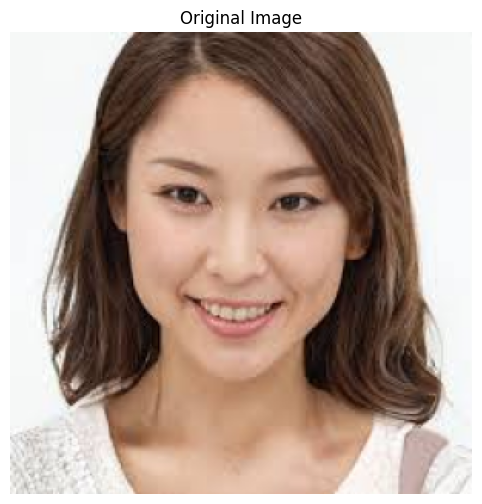

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 顔ランドマークモデルのパス（dlibのモデルをダウンロードする必要があります）
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"

# dlibの顔検出器とランドマーク予測器を初期化
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# グローバル変数を使って、顔を切り替えるためのフラグを保持
is_face_swapped = False

# 画像サイズを縮小する関数
def resize_image(image, width=None, height=None):
    if width is None and height is None:
        return image
    h, w = image.shape[:2]
    if width is None:
        ratio = height / float(h)
        dim = (int(w * ratio), height)
    else:
        ratio = width / float(w)
        dim = (width, int(h * ratio))

    return cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# 顔ランドマークを取得する関数
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    if len(rects) == 0:
        print("顔が検出されませんでした。")  # デバッグ用メッセージ
        return None
    print(f"顔を検出しました。ランドマークの数: {len(rects)}")  # デバッグ用メッセージ
    return np.array([[p.x, p.y] for p in predictor(gray, rects[0]).parts()])

# 顔の領域を取得し、その部分を交換する
def face_swap(img1, img2):
    print("顔交換処理を開始します...")  # デバッグ用メッセージ
    landmarks1 = get_landmarks(img1)
    landmarks2 = get_landmarks(img2)

    if landmarks1 is None or landmarks2 is None:
        print("顔が見つかりませんでした")  # デバッグ用メッセージ
        return img2

    # 顔の領域を抽出するマスクを作成
    mask = np.zeros_like(img2)
    hull = cv2.convexHull(np.array(landmarks2))
    cv2.fillConvexPoly(mask, hull, (255, 255, 255))

    # マスクのサイズが一致することを確認
    mask_resized = cv2.resize(mask, (img1.shape[1], img1.shape[0]))

    # 顔領域を抽出
    face_region = cv2.bitwise_and(img1, mask_resized)

    # 背景をマスクで除去し、顔領域を移植する
    img2_copy = cv2.bitwise_not(mask)
    img2_copy_resized = cv2.resize(img2_copy, (img2.shape[1], img2.shape[0]))
    result = cv2.add(cv2.bitwise_and(img2, img2_copy_resized), face_region)

    print("顔交換処理が完了しました。")  # デバッグ用メッセージ
    return result

# 画像表示用の関数を `matplotlib` で定義
def show_image(img, title="Image"):
    print(f"画像を表示します: {title}")  # デバッグ用メッセージ
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCVのBGR形式をRGBに変換
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 顔を交換または元に戻す処理
def swap_faces(img1, img2, is_face_swapped):
    if not is_face_swapped:
        print("顔を交換します。")  # デバッグ用メッセージ
        swapped_image = face_swap(img1, img2)
        is_face_swapped = True
    else:
        print("元の顔に戻します。")  # デバッグ用メッセージ
        swapped_image = img2
        is_face_swapped = False

    return swapped_image, is_face_swapped

# 画像を読み込み、最初に顔交換の準備をする
if __name__ == "__main__":
    img1 = cv2.imread('face1.jpg')  # 1つ目の顔画像
    img2 = cv2.imread('face2.jpg')  # 2つ目の顔画像

    if img1 is None or img2 is None:
        print("画像が読み込まれませんでした。ファイルパスを確認してください。")
    else:
        # 画像を縮小してメモリ使用量を削減
        img1 = resize_image(img1, width=300)
        img2 = resize_image(img2, width=300)

        # 最初は元の顔画像を表示
        is_face_swapped = False
        show_image(img2, title="Original Image")


In [ ]:
# prompt: # セルを実行するたびに顔が交換されます
# swapped_image, is_face_swapped = swap_faces(img1, img2, is_face_swapped)
# show_image(swapped_image, title="Swapped Face")

# セルを実行するたびに顔が交換されます
swapped_image, is_face_swapped = swap_faces(img1, img2, is_face_swapped)
show_image(swapped_image, title="Swapped Face")
